# Project : Predict The Medical Cost of Insurance Bills of Patients in Hospital

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#Fea">Feature Engineering/Data Preprocessing</a></li>
<li><a href="#mod">Modeling</a></li>
<li><a href="#modeva">Model Evaluation</a></li>
<li><a href="#hyp">HyperParameter Optimization</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
For this  project, I be looking at the Medical Cost Data Set from Kaggle. This dataset contains information on individual medical insurance bills. Each bill is associated with some demographic and personal characteristics of the person who received it.

For our regression problem, we're interested in how these different characteristics relate to the total medical cost. It's a continuous, positive number, which makes it a good candidate for a linear regression and other regressors. For this project, I want to construct the best possible predictive model for the cost, given some information about the patient. Predicting medical costs is an important task because it allows hospitals to predict revenue and plan necessary procedures needed by its patient population.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble  import RandomForestRegressor
from xgboost import XGBRFRegressor

In [2]:
df=pd.read_csv('induranceclean.csv')
df.head()

,Unnamed: 0,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
#drop unnecessary column
df=df.drop(columns=['Unnamed: 0'], axis=1)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

<a id='Fea'></a>
## Feature Engineering/Data Preprocessing/## Feature Selection

In [5]:
#check the data types
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
#convert the object variables to category
df['sex']=df['sex'].astype('category')
df['smoker']=df['smoker'].astype('category')
df['region']=df['region'].astype('category')

In [7]:
#comfirm the data types
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [8]:
#Encode the variables as neeeded
dummies=pd.get_dummies(df[['sex','smoker','region']])

In [9]:
df=pd.concat([df, dummies], axis=1)

In [10]:
df.head()

,age,sex,bmi,children,smoker,region,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,southwest,16884.92400,True,False,False,True,False,False,False,True
1,18,male,33.770,1,no,southeast,1725.55230,False,True,True,False,False,False,True,False
2,28,male,33.000,3,no,southeast,4449.46200,False,True,True,False,False,False,True,False
3,33,male,22.705,0,no,northwest,21984.47061,False,True,True,False,False,True,False,False
4,32,male,28.880,0,no,northwest,3866.85520,False,True,True,False,False,True,False,False


In [11]:
df.shape

(1338, 15)

In [12]:
df=df.drop(columns=['sex','smoker','region'], axis=1)

In [13]:
df.shape

(1338, 12)

In [14]:
#display d first five rows
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [15]:
#check the relationship betweeen the numerical predictors and the Charges
numerical_data=df[['age','bmi','children','charges']]

In [16]:
corr=numerical_data.corr()
corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [17]:
corr['charges'].sort_values(ascending=False)

charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64

from the result of the correlation coefficients of each predictors against the label, bmi and age have the highest correlation coefficient, though the correlation coefficients is not strong enough but as the data is not enough i will make do with **age and bmi.**

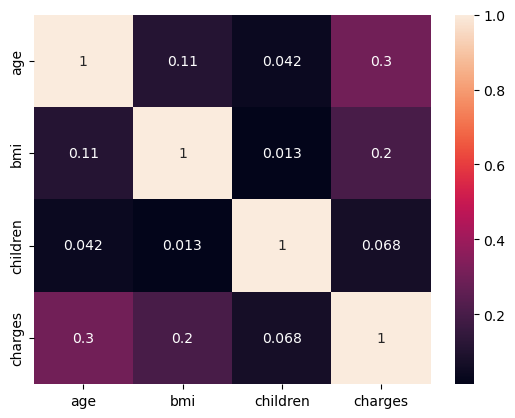

In [18]:
sns.heatmap(data=numerical_data.corr(), annot=True);

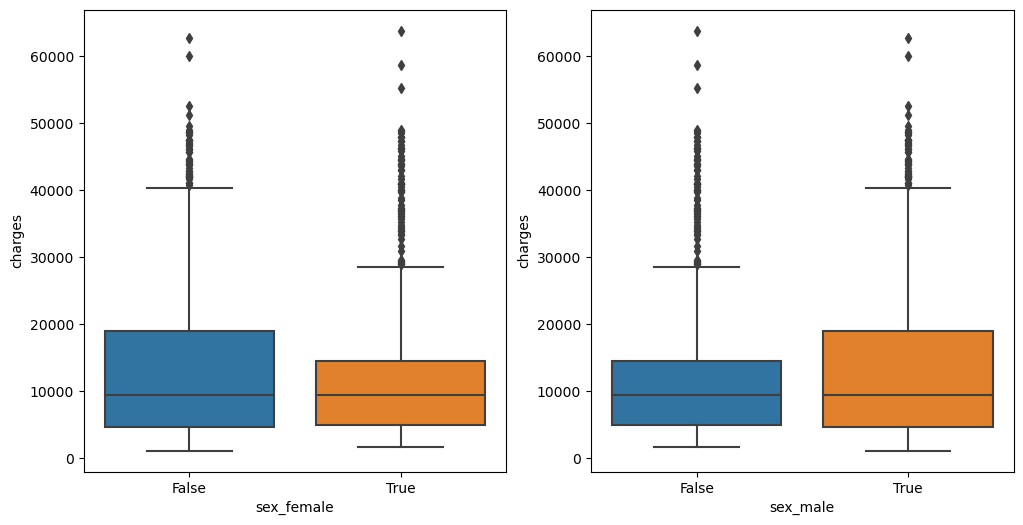

In [19]:
plt.figure(figsize=[12,6])

#see which of the categorical values will have impact on the label
plt.subplot(1,2,1)
sns.boxplot(data=df, x='sex_female', y='charges')

plt.subplot(1,2,2)
sns.boxplot(data=df, x='sex_male', y='charges');

#plt.subplot(1,3,3)
#sns.boxplot(data=data, x='children')

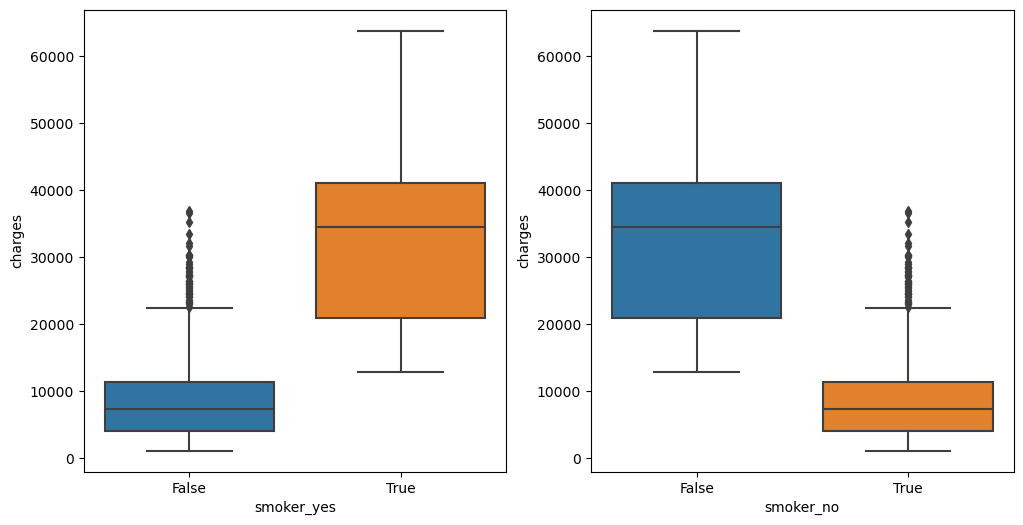

In [20]:
plt.figure(figsize=[12,6])

#see which of the categorical values will have impact on the label
plt.subplot(1,2,1)
sns.boxplot(data=df, x='smoker_yes', y='charges')

plt.subplot(1,2,2)
sns.boxplot(data=df, x='smoker_no', y='charges');

#plt.subplot(1,3,3)
#sns.boxplot(data=data, x='children')

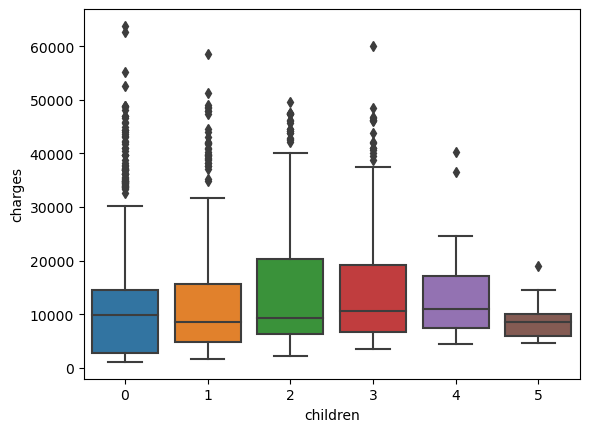

In [21]:
#see which of the categorical values will have impact on the label

sns.boxplot(data=df, x='children', y='charges');

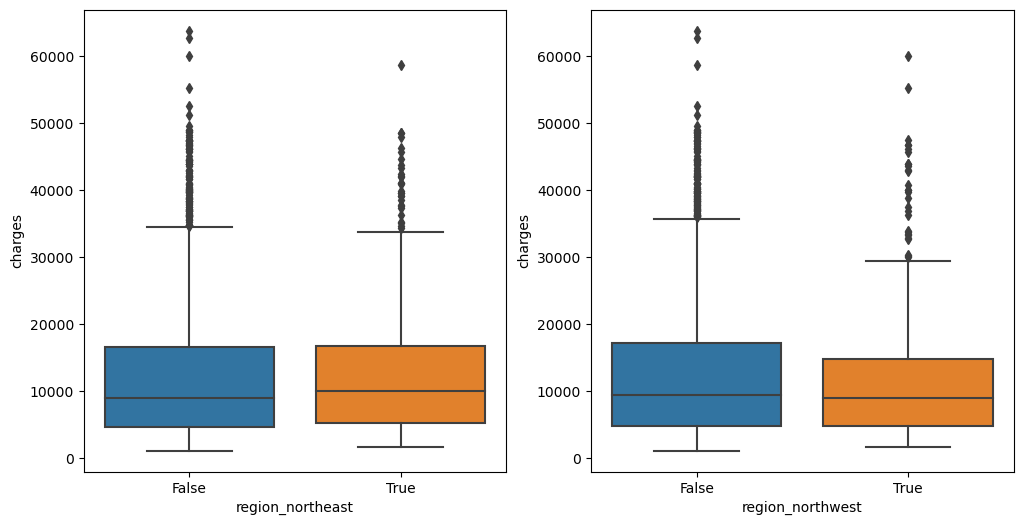

In [22]:
plt.figure(figsize=[12,6])

#see which of the categorical values will have impact on the label
plt.subplot(1,2,1)
sns.boxplot(data=df, x='region_northeast', y='charges')

plt.subplot(1,2,2)
sns.boxplot(data=df, x='region_northwest', y='charges');

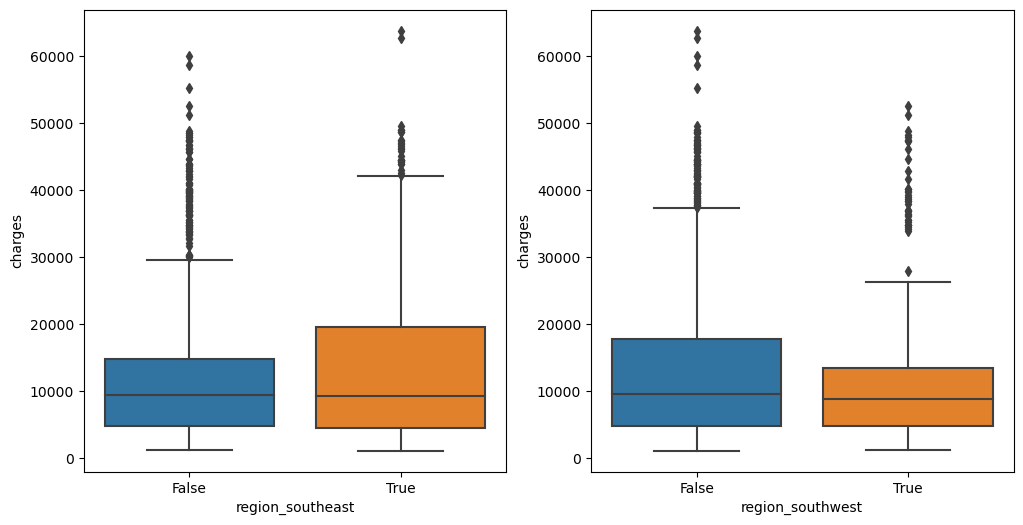

In [23]:
plt.figure(figsize=[12,6])
    
plt.subplot(1,2,1)
sns.boxplot(data=df, x='region_southeast', y='charges')

plt.subplot(1,2,2)
sns.boxplot(data=df, x='region_southwest', y='charges');

From the boxplots of the categorical variables, i can see obviously that some certain variables change as the label(charges) changes, hence such variables are better predictors of the labels .
The categorical variables that change respectively with the output are **Children,region_southeast, region_southwest,smoker_yes,smoker_no,sex_male, sex_female.**

In [24]:
df.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [26]:
#Q1 = df.quantile(.25, axis=0)
#print('first quartile',Q1)

In [27]:
#Q3 = df.quantile(.75, axis=0)
#print('first quartile',Q3)

In [ ]:
#inter quartile range
#IQR= Q3-Q1
#IQR

In [28]:
#df=df[((df < (Q1-1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
#df

In [29]:
df.shape

(1338, 12)

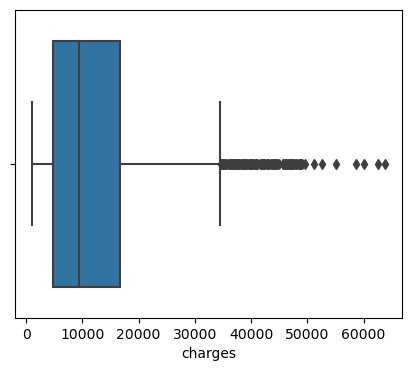

In [30]:
plt.figure(figsize=[5,4])
sns.boxplot(data=df, x='charges');

In [31]:
df=df[df['charges'] < 35000]
df.shape

(1205, 12)

In [32]:
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [33]:
df.dtypes 

age                   int64
bmi                 float64
children              int64
charges             float64
sex_female             bool
sex_male               bool
smoker_no              bool
smoker_yes             bool
region_northeast       bool
region_northwest       bool
region_southeast       bool
region_southwest       bool
dtype: object

In [34]:
#separate the predictors from the response variable.
x=df.drop(columns=['charges'], axis=1)
y=df['charges']

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#X= data.drop(columns=['Network'],axis=1)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

# Compute the covariance matrix
cov_matrix = np.cov(X_scaled.T)

# Compute the principal components
pca = PCA()
pca.fit(X_scaled)

# Determine the number of components to keep
explained_variance = pca.explained_variance_ratio_
n_components = np.argmax(np.cumsum(explained_variance) >= 0.95) + 1

# Fit PCA with the selected number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Get the names of the columns
component_names = ['PC{}'.format(i+1) for i in range(pca.n_components_)]
feature_names = list(x.columns)
component_names_and_features = list(zip(component_names, feature_names))

In [36]:
print(component_names_and_features)

[('PC1', 'age'), ('PC2', 'bmi'), ('PC3', 'children'), ('PC4', 'sex_female'), ('PC5', 'sex_male'), ('PC6', 'smoker_no'), ('PC7', 'smoker_yes'), ('PC8', 'region_northeast')]


In [37]:
df.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [38]:
x= df.drop(columns=['region_northwest','region_southeast','region_southwest','charges'],axis=1)
y= df['charges']

In [39]:
#split the data into train and test data

x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=30)
x_train.shape,y_train.shape

((964, 8), (964,))

In [40]:
#scale the data using either the minmac scaler or the standard scaler

#instantiate
scaler=MinMaxScaler()

#scale the train and test data
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)

In [41]:
df.to_csv('medicalcostdata.csv')

<a id='mod'> </a>
## Modelling Section

In [42]:
#instantiate the linear regression model
model= LinearRegression()

#fit the model
model.fit(x_train_scaled, y_train)

#make predictions
train_predictions=model.predict(x_train_scaled)
test_predictions=model.predict(x_test_scaled)

test_predictions[0:7]
train_predictions[0:7]

array([12746.61460231,  9950.89166859, 20191.34782727, 10368.80306216,
       13217.71047119,  9667.22320798,  4954.72073761])

In [43]:
coef=model.coef_
intercept=model.intercept_

coef,intercept

(array([11000.33831375,  3889.94834409,  2042.0214502 ,   139.63862678,
         -139.63862678, -7877.6375314 ,  7877.6375314 ,   948.1595373 ]),
 8920.737048648081)

In [44]:
#check the residuals
residuals= y_train - train_predictions
residuals_test= y_test- test_predictions

In [45]:
residual_mean= np.mean(residuals)
residual_variance=np.var(residuals)
residual_mean2=np.mean(residuals_test)
residual_variance2=np.var(residuals_test)

print(residual_mean, residual_variance)

-8.981731909624769e-13 22589536.130739447


In [46]:
plt.figure(figsize=[5,4])
sns.regplot(residuals, train_predictions)
plt.xlabel('Residuals')
plt.ylabel('Predictions')
plt.title('Graph of Variance of Residuals');

TypeError: regplot() takes from 0 to 1 positional arguments but 2 were given

<Figure size 500x400 with 0 Axes>

In [ ]:
plt.figure(figsize=[5,4])
sns.regplot(residuals_test, test_predictions)
plt.xlabel('Residuals')
plt.ylabel('Predictions')
plt.title('Graph of Variance of Residuals');

In [ ]:
df['res_train']=residuals
df['res_test']=residuals_test
sns.histplot(data=df, x='res_train', kde=True)
plt.xlabel('Train Residuals')
plt.title('Distribution of Train Errors or say errors')

In [ ]:
sns.histplot(data=df, x='res_test', kde=True)
plt.xlabel('Test Residuals')
plt.title('Distribution of Test Residuals');

<a id='modeva'> </a>
## Model Evaluation

In [ ]:
#evaluate the model using r2_score, score, and the mean_squared_error

train_score=model.score(x_train_scaled, y_train)
test_score=model.score(x_test_scaled, y_test)

print(train_score, test_score)

In [ ]:
Rmean_squared_error_train=mean_squared_error(y_train, train_predictions, squared=False)
Rmean_squared_error_test=mean_squared_error(y_test, test_predictions, squared=False)

In [ ]:
print(Rmean_squared_error_train)
print(Rmean_squared_error_test)

<a id='hyp'></a>
## Hyperparameter Optimization

In [ ]:
from sklearn.linear_model import Ridge
ridge_model= Ridge()
ridge_model.fit(x_train_scaled, y_train)
ridge_pred= ridge_model.predict(x_test_scaled)
ridge_pred_train= ridge_model.predict(x_train_scaled)

In [ ]:
#train score
train_score= ridge_model.score(x_train_scaled, y_train)
test_score= ridge_model.score(x_test_scaled, y_test)
rmse= mean_squared_error(y_test, ridge_pred, squared=False)

print(train_score)
print(test_score)
print(rmse)

In [ ]:
residuals_train=y_train-ridge_pred_train
residuals_test-= y_test-ridge_pred

In [ ]:
mean_train_residuals=np.mean(residuals_train)
mean_test_residuals=np.mean(residuals_test)
var_train_residuals=np.var(residuals_train)
var_test_residuals=np.var(residuals_test)

print('average train residuals is:' + str(mean_train_residuals))
print('average test residuals is:' + str(mean_test_residuals))
print('variance of train residuals is:' + str(var_train_residuals))
print('variance of test residuals is:' + str(var_test_residuals))

In [ ]:
sns.regplot(residuals_train, ridge_pred_train)
plt.xlabel('Train Residuals')
plt.ylabel('Predictions')
plt.title('Graph of variance of Train Residuals');

In [ ]:
sns.regplot(residuals_test, ridge_pred)
plt.xlabel('Test Residuals')
plt.ylabel('Test Predictions')
plt.title('Variance of Test Residuals');

In [ ]:
df['test_residuals']=residuals_test
df['train_residuals']=residuals_train

sns.histplot(data=df, x='test_residuals', kde=True)
plt.title('Distribution of Test Residuals');

In [ ]:
sns.histplot(data=df, x='train_residuals', kde=True)
plt.title('Distribution of Train Residuals');

### Decision Tree Model

In [ ]:
tree_model= DecisionTreeRegressor()
tree_model.fit(x_train_scaled, y_train)
pred_tree= tree_model.predict(x_test_scaled)
#train score
train_score= tree_model.score(x_train_scaled, y_train)
test_score= tree_model.score(x_test_scaled, y_test)
rmse= mean_squared_error(y_test, pred_tree, squared=False )
print(train_score)
print(test_score)
print(rmse)

### Hyperparameter optimization

In [ ]:
tree_model= DecisionTreeRegressor(max_depth=10, max_features=15, max_leaf_nodes=350)
tree_model.fit(x_train_scaled, y_train)
pred_tree= tree_model.predict(x_test_scaled)
pred_train= tree_model.predict(x_train_scaled)
#train score
train_score= tree_model.score(x_train_scaled, y_train)
test_score= tree_model.score(x_test_scaled, y_test)
rmse= mean_squared_error(y_test, pred_tree, squared=False )
print(train_score)
print(test_score)
print(rmse)

In [ ]:
residuals_train=y_train-pred_train
residuals_test-= y_test-pred_tree

mean_train_residuals=np.mean(residuals_train)
mean_test_residuals=np.mean(residuals_test)
var_train_residuals=np.var(residuals_train)
var_test_residuals=np.var(residuals_test)

print('average train residuals is:' + str(mean_train_residuals))
print('average test residuals is:' + str(mean_test_residuals))
print('variance of train residuals is:' + str(var_train_residuals))
print('variance of test residuals is:' + str(var_test_residuals))

In [ ]:
sns.regplot(residuals_train, pred_train)
plt.xlabel('Train Residuals')
plt.ylabel('Predictions')
plt.title('Graph of variance of Train Residuals');

In [ ]:
sns.regplot(residuals_test, pred_tree)
plt.xlabel('Test Residuals')
plt.ylabel('Test Predictions')
plt.title('Variance of Test Residuals');

In [ ]:
df['test_residuals']=residuals_test
df['train_residuals']=residuals_train

sns.histplot(data=df, x='test_residuals', kde=True)
plt.title('Distribution of Test Residuals');

In [ ]:
sns.histplot(data=df, x='train_residuals', kde=True)
plt.title('Distribution of Train Residuals');

### Random forest model

In [ ]:
rf_model= RandomForestRegressor()
rf_model.fit(x_train_scaled, y_train)
pred_tree= rf_model.predict(x_test_scaled)
pred_rf_train= rf_model.predict(x_train_scaled)
#train score
train_score= rf_model.score(x_train_scaled, y_train)
test_score= rf_model.score(x_test_scaled, y_test)
rmse= mean_squared_error(y_test, pred_tree, squared=False )
print(train_score)
print(test_score)
print(rmse)

In [ ]:
residuals_train=y_train-pred_rf_train
residuals_test-= y_test-pred_tree

mean_train_residuals=np.mean(residuals_train)
mean_test_residuals=np.mean(residuals_test)
var_train_residuals=np.var(residuals_train)
var_test_residuals=np.var(residuals_test)

print('average train residuals is:' + str(mean_train_residuals))
print('average test residuals is:' + str(mean_test_residuals))
print('variance of train residuals is:' + str(var_train_residuals))
print('variance of test residuals is:' + str(var_test_residuals))

In [ ]:
plt.figure(figsize=[5,4])
sns.regplot(residuals_train, pred_rf_train)
plt.xlabel('Residuals')
plt.ylabel('Predictions')
plt.title('Graph of variance of residuals');

In [ ]:
plt.figure(figsize=[5,4])
sns.regplot(residuals_test, pred_tree)
plt.xlabel('Residuals')
plt.ylabel('Predictions')
plt.title('Graph of variance of Test Residuals');

In [ ]:
df['test_residuals']=residuals_test
df['train_residuals']=residuals_train

sns.histplot(data=df, x='test_residuals', kde=True)
plt.title('Distribution of Test Residuals');

In [ ]:
sns.histplot(data=df, x='train_residuals', kde=True)
plt.title('Distribution of Train Residuals');

In [ ]:
x_train.head(2)

In [ ]:
#build a predictive system

data= (56,32.110,1,0,1,1,0,1)

data_array= np.asarray(data)

data_reshaped= data_array.reshape(1,-1)

prediction= rf_model.predict(data_reshaped)



In [ ]:
#predict the medical charges
prediction

In [ ]:
import pickle

filename= 'Medicalcharge_predictor.sav'
pickle.dump(rf_model, open(filename, 'wb'))

In [ ]:
#build a predictive system

data= (56,32.110,1,0,1,1,0,1)

data_array= np.asarray(data)

data_reshaped= data_array.reshape(1,-1)

model= pickle.load(open(filename, 'rb'))

prediction= model.predict(data_reshaped)
print(prediction)
